In [ ]:
from matplotlib import pyplot as plt
from celluloid import Camera
import numpy as np

fig, axes = plt.subplots(2)
camera = Camera(fig)
t = np.linspace(0, 2 * np.pi, 128, endpoint=False)
for i in t:
    axes[0].plot(t, np.sin(t + i), color='blue')
    axes[1].plot(t, np.sin(t + i), color='blue')
    camera.snap()
    
animation = camera.animate()
animation.save('celluloid_subplots.gif', writer = 'imagemagick')

In [ ]:
from matplotlib import pyplot as plt
from celluloid import Camera

fig = plt.figure()
camera = Camera(fig)
for i in range(20):
    t = plt.plot(range(i, i + 5))
    plt.legend(t, [f'line {i}'])
    camera.snap()
animation = camera.animate()
animation.save('celluloid_legends.gif', writer = 'imagemagick')

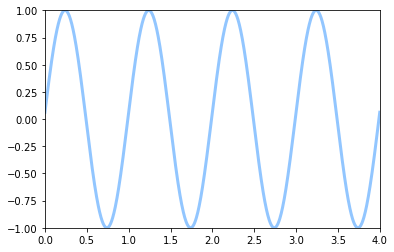

In [1]:
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use('seaborn-pastel')

fig = plt.figure()
ax = plt.axes(xlim=(0,4), ylim=(-1,1))
line, = ax.plot([], [], lw=3)

def function(t):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2*np.pi*(x-0.01*t))
    return (x, y)

def init():
    line.set_data([],[])
    return line,

def animate(i):
    x, y = function(i)
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init, \
                    frames=300, interval=1, blit=True)
anim.save('sine_wave.gif', writer='imagemagick')
rc('animation', html='html5'); anim

In [ ]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt 
import numpy as np 
plt.style.use('dark_background')

#Creating a blank window for animation
fig = plt.figure() 
ax = plt.axes(xlim=(-50, 50),ylim=(-50, 50)) 
line, = ax.plot([], [], lw=2) 

#What will our line dataset contain?
def init(): 
    line.set_data([], []) 
    return line, 

#Initializing empty values for x and y
xdata, ydata = [], [] 

# animation function 
def animate(i): 
    # t is a parameter 
    t = 0.1*i 
    # x, y values to be plotted 
    x = t*np.sin(t)
    y = t*np.cos(t)
    # appending new points to x, y axes points list 
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata) 
    return line, 

# setting a title for the plot 
plt.title('Creating a growing coil with matplotlib!') 
# hiding the axis details 
plt.axis('off') 

# call the animator	 
anim = animation.FuncAnimation(fig, animate, init_func=init, \
                               frames=500, interval=20, blit=True) 

# save the animation as mp4 video file 
anim.save('coil.gif', writer='imagemagick') 
anim.save('coil.mp4', writer='ffmpeg', fps=30)

In [ ]:

#importing libraries
import matplotlib.pyplot as plt
import matplotlib.animation as animation


fig = plt.figure()
#creating a subplot 
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    data = open('stock.txt','r').read()
    lines = data.split('\n')
    xs = []
    ys = []
   
    for line in lines:
        x, y = line.split(',') # Delimiter is comma    
        xs.append(float(x))
        ys.append(float(y))
   
    
    ax1.clear()
    ax1.plot(xs, ys)

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Live graph with matplotlib')
    
ani = animation.FuncAnimation(fig, animate, interval=1000) 
plt.show()


In [ ]:
import random
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig = plt.figure(figsize=(15,15))
x, y = [], []
index = 0

def animate(i):
    global index
    x.append(index); index+=1
    y.append(random.randint(2,20))
    plt.style.use("Solarize_Light2")
    plt.plot(x,y)

ani = FuncAnimation(fig, animate, interval=300)
plt.show()
ani.save('rg1.gif', writer='imagemagick')

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []

def data_gen():
    for cnt in itertools.count():
        t = cnt/10
        yield t, np.sin(2*np.pi*t)*np.exp(-t/20)

def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 10)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()
    if t>=xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)
    return line,

ani = animation.FuncAnimation(fig, run, data_gen, \
                              interval=10, init_func=init)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i/10.0))  # update the data
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init,
                              interval=25, blit=True)
plt.show()

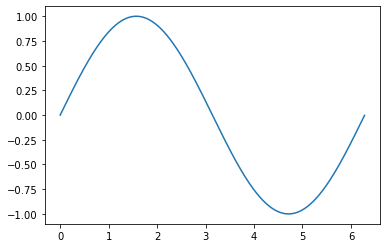

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))

def animate(i):
    line.set_ydata(np.sin(x + i / 50))  # update the data.
    return line,

ani = animation.FuncAnimation(fig, animate, \
                              interval=20, blit=True, save_count=50)

plt.show()
